# Lecture 20 - NLP with Hugging Face

[![View notebook on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/avakanski/Fall-2025-Applied-Data-Science-with-Python/blob/main/docs/Lectures/Theme_3-Model_Engineering/Lecture_20-NLP_with_Hugging_Face/Lecture_20-NLP_with_Hugging_Face.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/avakanski/Fall-2025-Applied-Data-Science-with-Python/blob/main/docs/Lectures/Theme_3-Model_Engineering/Lecture_20-NLP_with_Hugging_Face/Lecture_20-NLP_with_Hugging_Face.ipynb)

<a id='top'></a>

- [20.1 Introduction to Hugging Face](#20.1-introduction-to-hugging-face)
- [20.2 Hugging Face Pipelines](#20.2-hugging-face-pipelines)
- [20.3 Pipelines for NLP Tasks](#20.3-pipelines-for-nlp-tasks)
    - [20.3.1 Sentiment Analysis](#20.3.1-sentiment-analysis)
    - [20.3.2 Question Answering](#20.3.2-question-answering)
    - [20.3.3 Machine Translation](#20.3.3-machine-translation)
    - [20.3.4 Text Summarization](#20.3.4-text-summarization)
    - [20.3.5 Text Generation](#20.3.5-text-generation)
    - [20.3.6 Named Entity Recognition](#20.3.6-named-entity-recognition)
    - [20.3.7 Zero-shot Classification](#20.3.7-zero-shot-classification)
    - [20.3.8 Mask Filling](#20.3.8-mask-filling)
- [20.4 Tokenizers](#20.4-tokenizers)
- [20.5 Datasets](#20.5-datasets)    
- [20.6 Models](#20.6-models)
    - [20.6.1 Importing a Pretrained Model](#20.6.1-importing-a-pretrained-model)
    - [20.6.2 Generation Strategies](#20.6.2-generation-strategies)
    - [20.6.3 Fine-tuning a Pretrained Model](#20.6.3-fine-tuning-a-pretrained-model)
- [References](#references)

## 20.1 Introduction to Hugging Face <a name='20.1-introduction-to-hugging-face'></a>

**Hugging Face** ([link](https://huggingface.co/)) is a platform for Machine Learning and AI created in 2016, with the aim to "build, train, and deploy state of the art models powered by the reference open source in machine learning". Since then, Hugging Face has established itself as the main source for NLP and other Machine Learning tasks, providing open access to over 2 million pre-trained models, datasets, and pertinent tools and resources. Hugging Face focuses on community-building around open-source machine learning tools and data. They also developed several [courses](https://huggingface.co/course/chapter1/1) on how to use their libraries for various tasks. Also note that while open access is provided to the core NLP libraries, Hugging Face also offers pricing options for access to AutoNLP libraries.

<img src="images/hf_icon.png" width="500">

*Figure: Hugging Face webpage.*

Hugging Face initially focused on Transformer Networks and NLP, and afterward they expanded their libraries and tools to cover machine learning models and tasks, in general. State-of-the-art Transformer Networks are very large models, and hence, training such models from scratch is expensive and not affordable for many organizations. For example, the cost of training the GPT-4 model is estimated to be over USD $100 million. Providing access to pre-trained models for transfer learning and fine-tuning to specific tasks by Hugging Face has been a significant resource.

The core Hugging Face libraries include Transformer models, Tokenizers, Datasets, and Accelerate. Accelerate library enables distributed training with hardware acceleration devices, such as using multiple GPUs, or cloud accelerators with TPUs. In addition to these core libraries, Hugging Face provides various community resources, which include a platform for sharing models, code versioning, Spaces allow sharing apps developed with Hugging Face libraries and browsing apps created by others, etc.

<img src="images/hf_libraries.png" width="400">

*Figure: Hugging Face libraries.*

The key characteristics of these libraries include:

- Ease of use and simplicity, where downloading and using state-of-the-art NLP models can be done with a few lines of code.
- Flexibility, since all models are implemented either using the `nn.Module` in PyTorch or `tensorflow.keras.Model` in TensorFlow-Keras, allowing for easy model integration with these popular frameworks.


## 20.2 Hugging Face Pipelines <a name='20.2-hugging-face-pipelines'></a>

Hugging Face uses **Pipelines** as an API allowing to perform a a variety of NLP tasks through the `pipeline()` method.

The `pipeline()` method has the following syntax:

```
from transformers import pipeline

# Pipeline to use a default model & tokenizer for a given task
pipeline("<task-name>")

# Pipeline to use an existing or custom model
pipeline("<task-name>", model="<model_name>")

# Pipeline to use an existing or custom model and tokenizer
pipeline('<task-name>', model='<model name>', tokenizer='<tokenizer_name>')
```

Among the currently available task pipelines are:

- Sentiment analysis
- Question answering
- Translation
- Summarization
- Text generation
- NER (named entity recognition)
- Zero shot classification
- Fill mask

## 20.3 Pipelines for NLP Tasks <a name='20.3-pipelines-for-nlp-tasks'></a>

In this section, we will examine examples of using the `pipeline("<task-name>")` method with different NLP tasks. As we mentioned, if we don't provide the names for the used model and tokenizer, the pipeline will assign a default  model and tokenizer to complete the task, and it will download the model parameters and other required elements to perform the task.

 The Transformers library by Hugging Face is preinstalled in Google Colab. However, if you don't run this notebook in Google Colab, you will need to first install the Transformers library (`!pip install transformers`).

### 20.3.1 Sentiment Analysis <a name='20.3.1-sentiment-analysis'></a>

The first example uses `pipeline()` for sentiment analysis. We saw examples of sentiment analysis in the previous lectures, where the goal was to classify the sentiment in movie reviews text as positive or negative.

When the cell is executed, the pipeline will select a default pretrained model for sentiment analysis in English, it will download the model and the related tokenizer, and it will instantiate a text classifier object. In this case, we can see in the cell output that the used default pretrained model is `distilbert-base-uncased-finetuned-sst-2-english`. The argument `device=0` in the pipeline assigns the pipeline to a GPU device if it is available. For running the model on CPU use `device=-1`.

In [1]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", device=0)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In the next cell, the classifier is applied to a sentence. The output is the predicted label and the confidence score.

In [2]:
classifier("I fully understand what you are saying.")

[{'label': 'POSITIVE', 'score': 0.9996806383132935}]

The pipeline allows to pass multiple sentences, and it will return a sentiment label and confidence score for each sentence.

In [3]:
classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
)

[{'label': 'POSITIVE', 'score': 0.9598046541213989},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

### 20.3.2 Question Answering <a name='20.3.2-question-answering'></a>

This pipeline answers questions using information from a given context. Such pipeline can be very useful when we are dealing with long text data and finding answers to questions in the document can take time.

In [4]:
question_answerer = pipeline("question-answering", device=0)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


We can provide inputs to the pipeline as a dictionary with `question` and `context` as keys. The model extracts information from the provided context and returns a dictionary with a confidence score, start and end characters of the answer in the context, and the answer. Also note that the model does not generate new text to answer the questions, but instead it searches for the answer in the supplied context sequence.

In [5]:
input_1 = {
    "question" : "What didn't cross the street?",
    "context" : "The animal didn't cross the street because it was too tired",
    }

question_answerer(input_1)

/usr/local/lib/python3.12/dist-packages/transformers/pipelines/question_answering.py:395: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(


{'score': 0.755366325378418, 'start': 0, 'end': 10, 'answer': 'The animal'}

In [6]:
input_2 = {
    "question" : "Why the animal didn't cross the street?",
    "context" : "The animal didn't cross the street because it was too wide",
    }

question_answerer(input_2)

{'score': 0.6076138019561768,
 'start': 43,
 'end': 58,
 'answer': 'it was too wide'}

### 20.3.3 Machine Translation <a name='20.3.3-machine-translation'></a>

For machine translation, we can provide source and target languages in the pipeline, as in the next cell where the task `"translation_en_to_fr"` is to translate text from English to French. Although this pipeline can work with several languages, most often, machine translation requires to specify the name of the used language model, and only for several special cases it can work by specifying only the task name.

In [7]:
translator = pipeline("translation_en_to_fr", device=0)

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In [8]:
translator("I am a student")

[{'translation_text': 'Je suis un étudiant'}]

In [9]:
translator("Peyton Manning became the first quarterback ever to lead two different teams to multiple Super Bowls.")

[{'translation_text': 'Peyton Manning est devenu le premier quarterback à conduire deux équipes différentes à plusieurs Super Bowls.'}]

### 20.3.4 Text Summarization <a name='20.3.4-text-summarization'></a>

Text summarization reduces a longer text into a shorter summary.

In [10]:
summarizer = pipeline("summarization", device=0)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In [11]:
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
"""
)

[{'summary_text': ' The number of engineering graduates in the United States has declined in recent years . China and India graduate six and eight times as many traditional engineers as the U.S. does . Rapidly developing economies such as China continue to encourage and advance the teaching of engineering . There are declining offerings in engineering subjects dealing with infrastructure, infrastructure, the environment, and related issues .'}]

Specifying the `min_length` and `max_length` arguments allows to control the length of the summary.

In [12]:
summarizer(
    """
    Flooding on the Yangtze river remains serious although water levels on parts of the river decreased
    today, according to the state headquarters of flood control and drought relief .
    """, min_length=8, max_length=20)

[{'summary_text': ' Flooding on the Yangtze river remains serious although water levels on parts of the'}]

In [13]:
summarizer(
    """BAGHDAD -- Archaeologists in northern Iraq last week unearthed 2,700-year-old rock carvings featuring war scenes and trees from the Assyrian Empire, an archaeologist said Wednesday.
    The carvings on marble slabs were discovered by a team of experts in Mosul, Iraq’s second-largest city, who have been working to restore the site of the ancient Mashki Gate, which was bulldozed by Islamic State group militants in 2016.
    Fadhil Mohammed, head of the restoration works, said the team was surprised by discovering “eight murals with inscriptions, decorative drawings and writings.”
    Mashki Gate was one of the largest gates of Nineveh, an ancient Assyrian city of this part of the historic region of Mesopotamia.
    The discovered carvings show, among other things, a fighter preparing to fire an arrow while others show palm trees.
    """)

[{'summary_text': ' The carvings on marble slabs were discovered by a team of experts in Mosul, Iraq’s second-largest city . They have been working to restore the site of the ancient Mashki Gate, which was bulldozed by Islamic State group militants in 2016 . Mashki gate was one of the largest gates of Nineveh, an ancient Assyrian city of this part of Mesopotamia .'}]

### 20.3.5 Text Generation <a name='20.3.5-text-generation'></a>

In this example, we will use the `"text-generation"` pipeline to generate text based on a provided prompt.

In [14]:
generator = pipeline("text-generation", device=0)

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0



Now let’s provide a prompt text to the generator object, and the generator will continue the text. Note that text generation involves randomness, so some of the outputs will not be perfect. And admittedly, this is one of the most difficult NLP tasks.

In [15]:
outputs_1 = generator("In this course, we will teach you how to")

print(outputs_1[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In this course, we will teach you how to successfully write your own program for the Raspberry Pi. In the course, you will learn about building and booting your own Linux/OSX/Windows operating system.

The first three weeks of the course will cover basic programming concepts, including how to write programs for your favourite operating system, how to write your own program for a desktop computer, how to write your own program for a Raspberry Pi, how to build and install your own software, and how to install and configure your own software. In the course, we'll also cover how to write your own programs for the Raspberry Pi.

We will also take you through the basics of building a Raspberry Pi. In the next three weeks, we'll cover the basics of building a Debian-based Linux/OSX/Windows operating system, which will be designed to run on a Raspberry Pi.

The final three weeks of the course include the basics of how to install a Debian-based Linux/OSX/Windows operating system on the Raspberr

In [16]:
outputs_2 = generator("Niagara Falls is a city located in")

print(outputs_2[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Niagara Falls is a city located in northeastern Ontario and a part of North America.

Bridget C. Miller, a professor of geography at the University of Western Ontario, said the city has been known for many years for being a welcoming place to live.

"Because of the community's heritage, we have had a lot of people coming in here, a lot of people from all over the world coming in, and I think that has helped to increase our cultural community. Because of that, we have seen an increase in the number of people coming here," Miller said.

She said the city is still a vibrant place to live, but it's becoming more prevalent in the city's areas.

"In fact, the city is now on the map for the first time nationally with over 200,000 residents," Miller said. "In fact, we're going to have to start to attract more of those people, especially in the inner city."

Miller said the city's growing population is a major reason for the increase in the number of people coming into the city.

"This is reall

In [17]:
outputs_3 = generator("Niagara Falls is a famous world attractation")

print(outputs_3[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Niagara Falls is a famous world attractation for a variety of reasons. It has an abundance of natural plants and wildlife, as well as a reputation for a vibrant local community.

The town's natural resources are abundant. The Niagara Falls Park is a wonderful spot for wildlife viewing. The water is very clean as well as beautiful. The beach is well maintained and the river is protected.

The Falls has been popular for many years. It is a popular place to visit for tourists and it offers a lot of recreational activity. It is also a great place for a relaxing walk or a swim.

The Falls is located about five minutes north of Niagara Falls.

You can also see the Niagara Falls from the Niagara Falls Point. The Falls is closed to car or boat traffic.

The Falls is a popular destination for people who don't drive. There are a few cars and a few bikes in the park.

The Falls Falls is open from 9 AM to 5 PM, Saturday to Sundays from 9 AM to 5 PM, and from 8 PM to 5 PM, and from 8 PM to 4 PM.

T

### 20.3.6 Named Entity Recognition <a name='20.3.6-named-entity-recognition'></a>

Named Entity Recognition (NER), also known as named entity tagging, is a task of identifying parts of the input that represent entities. Examples of entities are:

- Location (LOC)
- Organizations (ORG)
- Persons (PER)
- Miscellaneous entities (MISC)

In [18]:
ner = pipeline("ner", grouped_entities=True, device=0)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0
/usr/lo

In [19]:
text_1 = "Abraham Lincoln was a president who lived in the United States."

print(ner(text_1))

[{'entity_group': 'PER', 'score': np.float32(0.9988935), 'word': 'Abraham Lincoln', 'start': 0, 'end': 15}, {'entity_group': 'LOC', 'score': np.float32(0.99965084), 'word': 'United States', 'start': 49, 'end': 62}]


Or, we can use Pandas to display the output.

In [20]:
import pandas as pd

pd.DataFrame(ner(text_1))

,entity_group,score,word,start,end
0,PER,0.998893,Abraham Lincoln,0,15
1,LOC,0.999651,United States,49,62


In [21]:
text_2 = """BAGHDAD -- Archaeologists in northern Iraq last week unearthed 2,700-year-old rock carvings featuring war scenes and trees from the Assyrian Empire, an archaeologist said Wednesday.
    The carvings on marble slabs were discovered by a team of experts in Mosul, Iraq’s second-largest city, who have been working to restore the site of the ancient Mashki Gate, which was bulldozed by Islamic State group militants in 2016.
    Fadhil Mohammed, head of the restoration works, said the team was surprised by discovering “eight murals with inscriptions, decorative drawings and writings.”
    Mashki Gate was one of the largest gates of Nineveh, an ancient Assyrian city of this part of the historic region of Mesopotamia.
    The discovered carvings show, among other things, a fighter preparing to fire an arrow while others show palm trees.
    """

pd.DataFrame(ner(text_2))

,entity_group,score,word,start,end
0,LOC,0.434807,BA,0,2
1,LOC,0.999473,Iraq,38,42
2,MISC,0.893630,Assyrian,132,140
3,LOC,0.782092,Empire,141,147
4,LOC,0.999238,Mosul,255,260
5,LOC,0.999156,Iraq,262,266
6,LOC,0.971527,Mashki Gate,347,358
7,ORG,0.997262,Islamic State,383,396
8,PER,0.999300,Fadhil Mohammed,426,441
9,LOC,0.974939,Mashki Gate,589,600


### 20.3.7 Zero-shot Classification <a name='20.3.7-zero-shot-classification'></a>

Zero-shot classification is a task to classify text documents, where the term
*zero-shot* classification refers to tasks for which a language model has not been trained. I.e., the model was not trained to classify documents using the provided type of labels in the next example.

In [22]:
classifier = pipeline("zero-shot-classification", device=0)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


The pipeline allows us to list `candidate labels` to be used for the classification. For this example, the model returned confidence scores for each category, and the highest probability was assigned to the "sports" category.

In [23]:
classifier(
    "Peyton Manning became the first quarterback ever to lead two different teams to multiple Super Bowls.",
    candidate_labels=["education", "politics", "business", "sports"],
)

{'sequence': 'Peyton Manning became the first quarterback ever to lead two different teams to multiple Super Bowls.',
 'labels': ['sports', 'business', 'education', 'politics'],
 'scores': [0.9866245985031128,
  0.006729836110025644,
  0.003462165826931596,
  0.003183396067470312]}

### 20.3.8 Mask Filling <a name='20.3.8-mask-filling'></a>

The pipeline with the `fill-mask` task is used to fill in blanks in an input text.

In [24]:
mask_filling = pipeline("fill-mask", device=0)

No model was supplied, defaulted to distilbert/distilroberta-base and revision fb53ab8 (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


We can provide the `top_k` argument to indicate the number of returned answers.

In [25]:
mask_filling("Abraham Lincoln was a <mask> who lived in the United States.", top_k=5)

[{'score': 0.3327236473560333,
  'token': 3661,
  'token_str': ' Democrat',
  'sequence': 'Abraham Lincoln was a Democrat who lived in the United States.'},
 {'score': 0.18090975284576416,
  'token': 1172,
  'token_str': ' Republican',
  'sequence': 'Abraham Lincoln was a Republican who lived in the United States.'},
 {'score': 0.03390646353363991,
  'token': 16495,
  'token_str': ' Jew',
  'sequence': 'Abraham Lincoln was a Jew who lived in the United States.'},
 {'score': 0.02841552160680294,
  'token': 24156,
  'token_str': ' Presbyterian',
  'sequence': 'Abraham Lincoln was a Presbyterian who lived in the United States.'},
 {'score': 0.02462913654744625,
  'token': 11593,
  'token_str': ' physician',
  'sequence': 'Abraham Lincoln was a physician who lived in the United States.'}]

In [26]:
mask_filling("Flooding on the Yangtze river remains serious although <mask> levels on parts of the river decreased today.", top_k=2)

[{'score': 0.2489064335823059,
  'token': 514,
  'token_str': ' water',
  'sequence': 'Flooding on the Yangtze river remains serious although water levels on parts of the river decreased today.'},
 {'score': 0.12597206234931946,
  'token': 11747,
  'token_str': ' oxygen',
  'sequence': 'Flooding on the Yangtze river remains serious although oxygen levels on parts of the river decreased today.'}]

## 20.4 Tokenizers <a name='20.4-tokenizers'></a>

**Tokenizers** library in Hugging Face is used to split input text data into tokens (e.g., words, characters, N-grams), and map the tokens to integers. When we use a pretrained model from Hugging Face for a downstream task, our text data needs to be preprocessed in the same way as the training data used with the model. Therefore, we will need to download the tokenizer for that specific model.

Let's consider the model `"distilbert-base-uncased"`, which is a version of the BERT transformer model, which takes case-insensitive English text as input data. Next, we will download the tokenizer for this model by using the `AutoTokenizer` class and its method `from_pretrained()`.  By using `AutoTokenizer` we don't need to manually download and manage the tokenizer files.

Or, we can also specify the tokenizer name for the model that we wish to use. For instance, for the BERT model, Hugging Face has a `BertTokenizer` that can be directly imported from the `transformers` package.

In [27]:
from transformers import AutoTokenizer

model = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model)

Let's now use the `tokenizer` to convert text sentences into a sequence of integers, and display the output.

The ouput of the tokenizer is a dictionary consisting of two key-value pairs:

- `input_ids`, a list of integers, where each index identifies a token. The indexing is based on the vocabulary of the training data that was used to train the model `"distilbert-base-uncased"`.
- `attention_mask`, a list of 1's or 0's, to indicate padding of the text sequence. This sentence does not have padding, since all elements have an attention mask of 1's. The attention mask ensures that the attention mechanism in Transformer is applied only to the real tokens, and the padding tokens are ignored.

In [28]:
output_tokens_1 = tokenizer('Tokenizing text is easy.')
print(output_tokens_1)

{'input_ids': [101, 19204, 6026, 3793, 2003, 3733, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}


Note that the above output has 8 tokens, although the input sentence has 4 words and the period mark. To understand better how the tokenization was performed, in the next cell we used the method `covert_ids_to_tokens()` to obtain the text for each integer value. Now we can see that the tokenizer places special tokens at the beginning and end of each sequence. `[CLS]` is placed at the beginning (it stands for Classification), and `[SEP]` is placed at the end of the sequence (it stands for Separate).

Also note that the gerund verb "tokenizing" is split into `'token'` and `'##izing'`. Using two tokens for the word allows to work with smaller vocabularies. I.e., instead of considering `token` and `tokenization` as two different words, by splitting the word into the root `token` and the suffix `ization`, the model will use two tokens that have a distinct semantic meaning. This approach of decomposing long words into subwords is especially efficient with some languages where one can form very long words by chaining simple subwords.

In [29]:
tokenizer.convert_ids_to_tokens(output_tokens_1.input_ids)

['[CLS]', 'token', '##izing', 'text', 'is', 'easy', '.', '[SEP]']

Most tokenizers in Hugging Face assign integers for the special tokens between 100 and 103.

These special tokens include:

- \[PAD\], padding.
- \[UNK\], unknown token.
- \[CLS\], sequence beginning.
- \[SEP\], sequence end.
- \[MASK\], masked tokens.

In [30]:
tokenizer.convert_ids_to_tokens([0, 100, 101, 102, 103])

['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]']

Another simple example is provided next. We can see that the word `'Transformer'` is tokenized as `'transform'` + `'##er'`.

In [31]:
output_tokens_2 = tokenizer('Using a Transformer network in Hugging Face is simple')
print(output_tokens_2)

{'input_ids': [101, 2478, 1037, 10938, 2121, 2897, 1999, 17662, 2227, 2003, 3722, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [32]:
tokenizer.convert_ids_to_tokens(output_tokens_2.input_ids)

['[CLS]',
 'using',
 'a',
 'transform',
 '##er',
 'network',
 'in',
 'hugging',
 'face',
 'is',
 'simple',
 '[SEP]']

Tokenizers can be applied to multiple text sequences. The argument `padding=True` is used below to pad the sequences to the longest sequence. Note below that 0's are added to pad the second sentence.

In [33]:
text_3 =  ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]

output_tokens_3 = tokenizer(text_3, padding=True)

In [34]:
print(output_tokens_3)

{'input_ids': [[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102], [101, 1045, 5223, 2023, 2061, 2172, 999, 102, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]}


The output is more readable if we print it line by line.

In [35]:
print("Input IDs")
for item in output_tokens_3.input_ids:
    print(item)

print("Attention Mask")
for item in output_tokens_3.attention_mask:
    print(item)

Input IDs
[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102]
[101, 1045, 5223, 2023, 2061, 2172, 999, 102, 0, 0, 0, 0, 0, 0, 0, 0]
Attention Mask
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


Note also that each sequence of tokens begins with 101 (`'[CLS]'`) and ends with  102 (`'[SEP]'`).

If `max_length` is provided, the tokenizer will truncate longer sentences to the specified length, as in the example in the next cell.

In [36]:
output_tokens_4 = tokenizer(text_3, padding=False, max_length=10)

print("Input IDs")
for item in output_tokens_4.input_ids:
    print(item)

print("Attention Mask")
for item in output_tokens_4.attention_mask:
    print(item)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Input IDs
[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 102]
[101, 1045, 5223, 2023, 2061, 2172, 999, 102]
Attention Mask
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]


The Tokenizers library also allows to train new tokenizers from scratch. For instance, if a large corpus of text is available in another language than English, a new tokenizer will need to be trained to efficiently deal with the differences in the punctuation and use of spaces in that language.

## 20.5 Datasets <a name='20.5-datasets'></a>

Hugging Face provides access to a large number of **datasets**. If you wish to check all datasets please follow this [link](https://huggingface.co/datasets).

To use the `datasets` library in Google Colab, we need to first install it.

In [37]:
!pip install -q datasets fsspec

In [38]:
import datasets
print(datasets.__version__)

4.0.0


Let's load the Emotions dataset. It contains Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise. We can just use `load_dataset()` to accomplish that.

In [39]:
from datasets import load_dataset

emotions = load_dataset("emotion")

We can see in the next cell that `emotions` dataset is a dictionary object that is split into training, validation, and test data sets, consisting of 16,000, 2,000, and 2,000 messages, respectively.

In [40]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

The first and second training samples are shown next. They contain the text and the corresponding emotion label.

In [41]:
emotions['train'][0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [42]:
emotions['train'][1]

{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'label': 0}

The order of the labels for the emotion categories are shown in the next cell.

In [43]:
emotions['train'].features

{'text': Value('string'),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])}

Hugging Face also allows to use the `set_format()` method with datasets, and to define the format of the data. For instance, by setting the type to Pandas, we can obtain the data as Pandas DataFrames.

In [44]:
emotions.set_format(type='pandas')
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


We can use a bar plot to plot the number of values in each category.

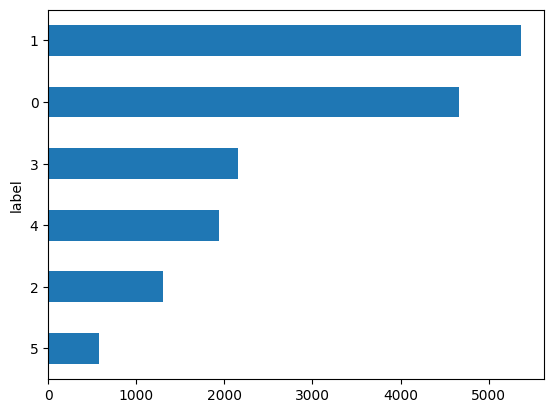

In [45]:
import matplotlib.pyplot as plt

df["label"].value_counts(ascending=True).plot.barh()
plt.show()

### Apply a Tokenizer to a Dataset

Let's show next how we can use a tokenizer to convert the first 5 samples in the training dataset to sequences of tokens. Since in the previous cells we set the format of the dataset to `pandas`, we need to first re-set the format to `type=None`.

In [46]:
emotions.set_format(type=None)

training_samples_5 = emotions["train"][:5]
training_samples_5

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

Let's extract only the text data, and not the labels.

In [47]:
text_training_5 = training_samples_5['text']
text_training_5

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

Apply the tokenizer, and display the sequence of tokens.

In [48]:
output_tokens_5 = tokenizer(text_training_5, padding=True)

print("Input IDs")
for item in output_tokens_5.input_ids:
    print(item)

print("Attention Mask")
for item in output_tokens_5.attention_mask:
    print(item)

Input IDs
[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]
[101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[101, 1045, 2572, 2412, 3110, 16839, 9080, 12863, 2055, 1996, 13788, 1045, 2097, 2113, 2008, 2009, 2003, 2145, 2006, 1996, 3200, 102, 0]
[101, 1045, 2572, 3110, 24665, 7140, 11714, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Attention Mask
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 20.6 Models <a name='20.6-models'></a>

### 20.6.1 Importing a Pretrained Model <a name='20.6.1-importing-a-pretrained-model'></a>

Instead of using a default model for a task, we can also select a language model from the many available in Hugging Face. Let's use GPT-2 language model, and we will also need to use the corresponding tokenizer for GPT-2.

The parameter `pad_token_id` is optional, and its purpose is to define the ID (assigned integer value) for the token used for padding the text sequences. In this case, the ID of the padding token is set to the ID of the end-of-sequence token (`eos_token_id`), which is a common choice for padding in language models.

In [49]:
from transformers import GPT2LMHeadModel
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

model = GPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

### 20.6.2 Generation Strategies <a name='20.6.2-generation-strategies'></a>

To generate text with a pretrained sequence-to-sequence model using the Hugging Face library, we will use the `model.generate` method. The generation process involves making several choices, each with its own set of advantages and trade-offs. Based on the selected generation strategy, the model output can vary significantly.

Let's consider the sentence `input_string` in the next cell. We will first preprocess it with the tokenizer to `encode` it into a sequence of integers. The argument `return_tensors="pt"` specifies that the output should be returned as PyTorch tensors, where `"pt"` stands for PyTorch.

In [50]:
input_string = "Yesterday I spent several hours in the library, studying"
input_tokens = tokenizer.encode(input_string, return_tensors="pt")

Next, we will use the GPT-2 model for text generation with the `model.generate` method, to generate text that continues the input sentences. Afterward, we will use the tokenizer with the `tokenizer.decode` method to convert the generated sequence by the model into a text string.

You can notice that the generated text sequence is not the best, since after the initial sequence of words, the model got stuck into a loop, and began repeating the same sequence. To deal with repetitive text generation, we can apply a different sampling strategy, as explained next.

In [51]:
output_greedy = model.generate(input_tokens, max_length=64)

print(tokenizer.decode(output_greedy[0], skip_special_tokens=True))

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Yesterday I spent several hours in the library, studying the books, and I was amazed at how much I had learned. I was amazed at how much I had learned. I was amazed at how much I had learned. I was amazed at how much I had learned. I was amazed at how much I had learned.


#### Search Methods

Two common methods for generating text with Language Models are:

 - **Greedy search**, selects the word with the highest probability as the next word. The major drawback of greedy search is that it can miss potentially high-probability words that follow a low-probability word. Therefore, although each individual word may be the best fit when generating a response, the entire generated text can be less relevant for the query.
 - **Beam search**, selects a sequence of words (beam) that has the overall highest probability. This approach reduces the risk of missing high-probability words, because rather than focusing only on the next word in a sequence, beam search looks at the probability of the entire response.

Beam search is typically preferred over greedy search, because with beam search, the model can consider multiple routes and find the best option.

For example, in the following figure, the input query to the model is "The Financial Times is ...". The model created four possible beams with a potential response, and out of the four beams, the third beam "a newspaper founded in 1888" was selected as the most coherent human-like response.

<img src='images/beam_search.png' width=500px>

*Figure: Beam search example.* Source: [link](https://ig.ft.com/generative-ai/)

To deal with repetitive text generation in the above example which uses greedy search, let's apply a beam search strategy. This is shown in the following cell, where beam search examines multiple probable solutions (beams) for the generated text, that is set by the argument `num_beams=32`. We also applied a penalty term for repeating the same two consecutive words with the argument `no_repeat_ngram_size=2`. By considering several possible solutions, the beam search algorithm tries to improve the generated output text by the model.

In [52]:
output_beam = model.generate(input_tokens, max_length=64, num_beams=32, no_repeat_ngram_size=2)

print(tokenizer.decode(output_beam[0], skip_special_tokens=True))

Yesterday I spent several hours in the library, studying all the books I could get my hands on, and trying to figure out what I wanted to do with them. I didn't know what to expect, but I did know that it was going to be a lot of fun.

When I got home, I


#### Sampling-based Methods

Greedy search and beam search aim to find the best sequence of tokens that maximizes the likelihood of the generated text. Beside search methods,  modern language models also employ **sampling-based methods** that introduce controlled randomness to generate more diverse and creative text. Instead of always choosing the most likely tokens, these methods sample from the model's probability distribution, allowing for variability in the generated output.

Sampling-based methods are especially useful for tasks like creative writing, dialogue generation, and open-ended text completion.

Sampling-based strategies include the following.

1. Temperature Sampling

**Temperature** controls the randomness of predictions by scaling the logits (raw prediction scores) before the softmax activation function in the output layer. A typical defaul temperature value is 1.0. Lower temperature values in the range 0.1 - 0.7 make the model more confident and deterministic, whereas higher temperature values in the range 1.0 - 2.0 increase randomness and creativity in the generated text.

The next example shows two different responses with a low and high temperature. The argument `do_sample=True` specifies that the model should sample from the probability distribution of possible next tokens.

In [53]:
input_string = "The secret door opened, revealing"
input_tokens = tokenizer.encode(input_string, return_tensors="pt")

In [54]:
# Low temperature - more focused and deterministic
output_low_temp = model.generate(input_tokens, max_length=80, do_sample=True, temperature=0.3, num_return_sequences=1)

# High temperature - more random and creative
output_high_temp = model.generate(input_tokens, max_length=80, do_sample=True, temperature=1.5, num_return_sequences=1)

print("Low Temperature Output:")
print(tokenizer.decode(output_low_temp[0], skip_special_tokens=True))
print("\nHigh Temperature Output:")
print(tokenizer.decode(output_high_temp[0], skip_special_tokens=True))

Low Temperature Output:
The secret door opened, revealing a man in a white suit and a black suit. He was dressed in a white suit, black tie, and a black shirt. He was wearing a black t-shirt and black pants. He was wearing a black T-shirt and black pants. He was wearing a black T-shirt and black pants. He was wearing a black T-shirt and black pants

High Temperature Output:
The secret door opened, revealing Jannette, the blonde-haired queen's favorite model, with her black hair cascading in two. She smiled out loud, a look of delight that she held before her.

The other two watched in silence as one of the girls looked at the queen. She reached up toward the queen of the room and placed a hand over her mouth. She placed


2. Top-K Sampling

**Top-K sampling** limits the model to selecting from only the K most likely next tokens at each step. At each generation step, the model keps only the top K tokens (those with the highest probability), and samples randomly from this reduced set of tokens. Instead of selecting the token with the highest probability as in greedy search, top-K sampling considers several most likely tokens at each step.

A typical default value for K is 50. Small K values in the range 10-20 result in more focused but less diverse response, and large K values over 100 produce more diverse but potentially less coherent text.

In [55]:
# Top-K sampling with K=10
output_low_topk = model.generate(input_tokens, max_length=80, do_sample=True, top_k=10, num_return_sequences=1)

# Top-K sampling with K=100
output_high_topk = model.generate(input_tokens, max_length=80, do_sample=True, top_k=100, num_return_sequences=1)

print("Low Top-K Output:")
print(tokenizer.decode(output_low_topk[0], skip_special_tokens=True))
print("\nHigh Top-K Output:")
print(tokenizer.decode(output_high_topk[0], skip_special_tokens=True))

Low Top-K Output:
The secret door opened, revealing a man with a gun drawn. The man turned around and pointed a handgun at the woman with the rifle at her side and told her that he had a gun. When the woman looked back at her assailant and said that he would kill her he shot her in the neck. The woman was hit and was taken to a hospital for treatment.

The man said the

High Top-K Output:
The secret door opened, revealing the body

of the former assassin of the city's great spy,

Dr. Zemma.

Dr. Zemma, the former assassin of San Ramon who's now

going to have his own trial.

"Shall we hold a new trial?" he exclaimed, his voice trembling.

The old assassin,


3. Top-P (Nucleus) Sampling

**Top-P sampling** (also called nucleus sampling) selects the smallest set of tokens whose cumulative probability exceeds a chosen threshold P. It ranks all tokens by probability and samples from a reduced "nucleus" of tokens with cumulative probability greater than P.

When the model is confident fewer tokens are considered, and when the model is uncertain more tokens are included. A typical default value for P is 0.9. Lower values for P in the range 0.5-0.7 produce more deterministic and focused outputs, while higher values for P in the range 0.95-1.0 result in more diverse and creative outputs.

In [56]:
# Top-P sampling with P=0.1
output_low_topp = model.generate(input_tokens, max_length=80, do_sample=True, top_p=0.5, num_return_sequences=1)

# Top-K sampling with P=0.9
output_high_topp = model.generate(input_tokens, max_length=80, do_sample=True, top_p=0.95, num_return_sequences=1)

print("Low Top-P Output:")
print(tokenizer.decode(output_low_topp[0], skip_special_tokens=True))
print("\nHigh Top-P Output:")
print(tokenizer.decode(output_high_topp[0], skip_special_tokens=True))

Low Top-P Output:
The secret door opened, revealing a large man, wearing a dark suit and black trousers, and a white hat. He was dressed in a white suit and black trousers. He walked up to the man and asked him for his name. The man said he was James, and that he was a man of great power. He asked if he could help him, and he said he would. The man

High Top-P Output:
The secret door opened, revealing that it was a boy. "How did you find me?" he asked, trying to get at his father's face.

My mom answered, "Well, you've been living with my father." I smiled, then looked up, as though I were about to cry. His face was pale, a look that made me freeze. He stared at the door


It is also possible to combine different sampling methods as in the next example.

In [57]:
# Combination: top_k=60, top_p=0.95, temp=1.5
output = model.generate(input_tokens, max_length=80, do_sample=True, top_k=60, top_p=0.95, temperature=1.5)

print(tokenizer.decode(output[0], skip_special_tokens=True))

The secret door opened, revealing a strange, unbroken network of human figures standing atop his bedsheets. All of them, except maybe their boss; it all seemed normal- but just the two of you!
            "What?" your wife demanded from in surprise. The sound of your throat pushing against the bedspread made her panic.
(And just maybe the way her husband tried to


Other parameters in `model.generate` include:

- `repetition_penalty`: Discourages the model from repeating the same tokens or phrases. Values > 1.0 penalize repetition, and values over 1.2-1.5 reduce repetition more aggressively.
- `length_penalty`: Controls the model's preference for longer or shorter sequences (mainly used with beam search). Values < 1.0 favor shorter responses, and values > 1.0 favorr longer responses.
- `no_repeat_ngram_size`: Prevents repeating any n-gram of the specified size. We used it above in beam search example.
- `min_length` and `max_lengthe`: Define the minimum and maximum number of tokens in the generated text.

Recommendations for text generation:

- Use lower temperature for factual tasks, and higher temperature for creative tasks.
- Enable `do_sample=True` when using temperature, top-K, or top-P sampling.
- Start with default values, such as `top_p=0.9`, `temperature=1.0`, and `top_k=0.9`.
- Use `repetition_penalty` to avoid loops and repetitive phrases, especially with smaller models.
- Combine sampling methods, such as `top_k=50`, `top_p=0.9`, `temperature=0.8`, for better control of diversity and cohernce.
- Generate multiple sequences  with `num_return_sequences` and select the best one.

### 20.6.3 Fine-tuning a Pretrained Model <a name='20.6.3-fine-tuning-a-pretrained-model'></a>

The next section demonstrates how to use a pretrained model and tokenizer in Hugging Face, and fine-tune the model to a dataset. We will use the DistilBERT model for this task, and we will again use the Emotions dataset.

Let's first download the tokenizer for the `"distilbert-base-uncased"` model.

In [58]:
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

The following code tokenizes the emotions dataset. It is common to use the `Dataset.map()` method in Hugging Face for tokenization, which applies a function on each sample in the dataset. Therefore, we first define a function `tokenize` that is used in the `Dataset.map()` method. Using the option `batched=True` in the `map()` method will apply the tokenization to a batch of input sequences instead of each text sequence, which will speed up the tokenization. And, as we learned in the previous section, `tokenize` returns a dictionary with keys `input_ids` and `attention_mask`.

In [59]:
def tokenize(rows):
    return tokenizer(rows['text'], truncation=True)

tokenized_datasets = emotions.map(tokenize, batched=True)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [60]:
tokenized_train_dataset = tokenized_datasets["train"]
tokenized_val_dataset = tokenized_datasets["validation"]
tokenized_test_dataset = tokenized_datasets["test"]

`DataCollatorWithPadding` in Hugging Face pads the tokenized input samples during batches preparation to have the same length. I.e., it pads each sentence to the maximum length in each batch. This is referred to as dynamic padding, and it is more efficient than padding each sequence to a fixed length, because it only pads as much as necessary. By passing the tokenizer to `DataCollatorWithPadding`, the function can handle the specific padding requirements for the used model, such as special tokens like [PAD] that are used in the DistilBERT model.

In [61]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Next, we will load the distilbert model for classification. Hugging Face Transformers library provides an `AutoModel` class which also has a `from_pretrained()` method that can be used to load a pretrained checkpoint.

In [62]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=6)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Transformers library in Hugging Face provides a `Trainer` class for model training, which is similar to `model.fit` in Keras-TensorFlow. That is, we just need to pass all parameters that are needed for training, and afterwards run `Trainer.train()` to fit the model to the data. The input parameters are first defined with the class `TrainingArguments` as shown in the next cell. In this case, the Training Arguments inlcude the output directory to save the training outputs, evaluation strategy, learning rate, batch sizes for training and validation, number of training epochs, weight decay, and whether to report the results to external tools.

In [63]:
from transformers import TrainingArguments

# Define training arguments for the model
training_args = TrainingArguments(
    # Directory to save model checkpoints and logs
    output_dir="bert-emotion",
    # Evaluation strategy - evaluate the model at the end of each epoch
    eval_strategy="epoch",
    # Learning rate for the optimizer
    learning_rate=2e-5,
    # Batch size for training
    per_device_train_batch_size=16,
    # Batch size for evaluation
    per_device_eval_batch_size=16,
    # Number of training epochs
    num_train_epochs=2,
    # Weight decay to apply for regularization
    weight_decay=0.01,
    # Disable reporting to external tools (e.g., WandB, TensorBoard)
    report_to="none"
)

We will also define a function called `compute_metrics` to calculate the accuracy at the end of each epoch.

In [64]:
from sklearn.metrics import accuracy_score

# Function to compute metrics during training
def compute_metrics(eval_pred):
    outputs, labels = eval_pred
    predictions = outputs.argmax(axis=-1)
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc}

Next, we will define our `trainer` as an instance of the `Trainer` class by passing the model that we defined, the training arguments, the training and validation datasets, tokenizer, data collator, and the function for computing performance metrics (accuracy). Afterward, we will initialize the training by running `trainer.train()` as in the following cell. We can see that the loss and accuracy values are reported after each epoch.

In [65]:
from transformers import Trainer

# Initialize the Trainer with the required parameters
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

/tmp/ipython-input-1879187504.py:4: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [66]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.257800,0.220022,0.922000
2,0.148800,0.163510,0.937000


TrainOutput(global_step=2000, training_loss=0.3261281471252441, metrics={'train_runtime': 305.4095, 'train_samples_per_second': 104.777, 'train_steps_per_second': 6.549, 'total_flos': 389287358125632.0, 'train_loss': 0.3261281471252441, 'epoch': 2.0})

Next, let's evaluate the model performance on the test dataset. The calculated accuracy is 92.6%.

In [67]:
# Evaluate the model on the test dataset
test_metrics = trainer.evaluate(eval_dataset=tokenized_datasets["test"])

# Print the evaluation metrics
print(test_metrics)

{'eval_loss': 0.1721537709236145, 'eval_accuracy': 0.926, 'eval_runtime': 2.8069, 'eval_samples_per_second': 712.538, 'eval_steps_per_second': 44.534, 'epoch': 2.0}


In addition, let's predict the class labels for the four sentences shown below. First, we will need to apply the tokenizer to prepare the sentences.

In [68]:
# List of sentences to evaluate
test_texts = ["I feel fantastic!", "I'm a bit sad today.", "This is so exciting!", "I'm very stressed out."]

# Tokenize the sentences, pad them to the same length for batch processing
inputs = tokenizer(test_texts, return_tensors="pt", padding=True, truncation=True).to(device=0)
inputs

{'input_ids': tensor([[  101,  1045,  2514, 10392,   999,   102,     0,     0,     0,     0],
        [  101,  1045,  1005,  1049,  1037,  2978,  6517,  2651,  1012,   102],
        [  101,  2023,  2003,  2061, 10990,   999,   102,     0,     0,     0],
        [  101,  1045,  1005,  1049,  2200, 13233,  2041,  1012,   102,     0]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]], device='cuda:0')}

In the next cell, we pass the inputs to the model, and use `argmax` to calculate the predicted labels for the sentences.

In [69]:
# Forward pass through the model
outputs = model(**inputs)

# Get predicted labels for each sentence
predicted_labels = outputs.logits.argmax(axis=-1).cpu().tolist()
print("Predicted Labels:", predicted_labels)

Predicted Labels: [1, 0, 1, 3]


To understand the predicted labels, let's retrieve the class names, and print the sentences with the class names of the predicted labels.

In [70]:
# Emotion class names
class_names = emotions["train"].features["label"].names
class_names

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [71]:
# Print results
for text, label in zip(test_texts, predicted_labels):
    print(f"Text: '{text}'; Predicted Label: {class_names[label]}")

Text: 'I feel fantastic!'; Predicted Label: joy
Text: 'I'm a bit sad today.'; Predicted Label: sadness
Text: 'This is so exciting!'; Predicted Label: joy
Text: 'I'm very stressed out.'; Predicted Label: anger


## References <a name='references'></a>

1. Hugging Face Course, available at [https://huggingface.co/course/chapter1/1](https://huggingface.co/course/chapter1/1).
2. Applications of Deep Neural Networks, Course at Washington University in St. Louis, Jeff Heaton, available at [https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_11_01_huggingface.ipynb](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_11_01_huggingface.ipynb).
3. Getting Started with Hugging Face Transformers for NLP, Exxact Blog, available at [https://www.exxactcorp.com/blog/Deep-Learning/getting-started-hugging-face-transformers](https://www.exxactcorp.com/blog/Deep-Learning/getting-started-hugging-face-transformers).
4. An Introduction to Using Transformers and Hugging Face, Zoumana Kelta, available at [https://www.datacamp.com/tutorial/an-introduction-to-using-transformers-and-hugging-face](https://www.datacamp.com/tutorial/an-introduction-to-using-transformers-and-hugging-face).

[BACK TO TOP](#top)